<a href="https://colab.research.google.com/github/imarariyal/SP500-Clustering-Analysis-/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Task 01: Data Loading

In [1]:
#install libraries (provides financial data)
!pip install yfinance
!pip install yahoofinancials

#import libraries
import yfinance as yf
from yahoofinancials import YahooFinancials
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
import requests

####Part A

In [2]:
# 1. DATA LOADING
# 1.1 Extract S&P500 tickers from Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Add a User-Agent header to mimic a web browser
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

# Fetch the HTML content using requests
response = requests.get(url, headers=headers)
response.raise_for_status() # Raise an exception for HTTP errors

tables = pd.read_html(response.text)
sp500 = tables[1]
tickers = sp500['Symbol'].tolist()
print(f"Extracted {len(tickers)} tickers from Wikipedia")

Extracted 503 tickers from Wikipedia


In [3]:
sp500.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


####Part B

In [4]:
#Uploading historical data from Yahoo Finance
start_date = "2022-01-01"
end_date = "2025-01-01"

## Pandas data frame for the period "01-01-2022" to "01-01-2025"
data = yf.download(tickers, start=start_date, end=end_date, group_by='tickers', threads=True)

[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
ERROR:yfinance:['SOLS', 'Q']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1641013200, endDate = 1735707600")')
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01)')


In [5]:
data.head()

Ticker             DRI                                               \
Price             Open        High         Low       Close   Volume   
Date                                                                  
2022-01-03  131.326421  132.445579  127.689148  130.084854  1106800   
2022-01-04  131.737360  132.795322  130.653169  132.550507  1288000   
2022-01-05  133.040143  135.741862  130.626946  131.090347  1410900   
2022-01-06  131.763598  132.436847  128.712147  128.895752  1292100   
2022-01-07  128.966216  129.988083  128.050069  128.314346  1020700   

Ticker             IBM                                               ...  \
Price             Open        High         Low       Close   Volume  ...   
Date                                                                 ...   
2022-01-03  114.487515  116.383246  114.111780  116.169762  4605900  ...   
2022-01-04  116.220990  119.508644  116.050192  117.860550  7300000  ...   
2022-01-05  118.108193  121.430012  117.741006  118.031342  8956900  ...   
2022-01-06  118.014247  118.193580  113.155337  115.571983  9908100  ...   
2022-01-07  115.196259  115.845260  114.009285  115.136490  5238100  ...   

Ticker             GPN                                               \
Price             Open        High         Low       Close   Volume   
Date                                                                  
2022-01-03  131.050242  137.219925  130.915070  136.814407  3071000   
2022-01-04  138.243393  141.391004  135.897183  140.415817  3985000   
2022-01-05  140.415802  146.131703  140.000635  141.371674  5054500   
2022-01-06  142.926184  148.275183  142.443423  146.044815  4486800   
2022-01-07  144.886190  148.458617  144.693088  145.021362  2698000   

Ticker            FTV                                            
Price            Open       High        Low      Close   Volume  
Date                                                             
2022-01-03  56.101412  56.746514  54.258802  54.551693  3696093  
2022-01-04  54.826047  55.211623  54.529448  54.774143  3027683  
2022-01-05  55.026250  55.448904  53.409794  53.617413  3690652  
2022-01-06  53.832454  54.166127  53.446877  53.721230  1824492  
2022-01-07  53.647071  53.965913  53.202174  53.350471  2417794  

[5 rows x 2519 columns]

####Part C

In [6]:
data.describe()

Ticker         DRI                                                    \
Price         Open        High         Low       Close        Volume   
count   753.000000  753.000000  753.000000  753.000000  7.530000e+02   
mean    137.441776  138.868198  135.991872  137.442424  1.225292e+06   
std      17.185787   17.095223   17.310635   17.180415  5.063089e+05   
min      99.772307  100.785223   98.590569   99.372467  3.360000e+05   
25%     125.273050  127.012730  123.812863  125.508636  9.142000e+05   
50%     138.663510  139.852453  137.413226  138.723999  1.119800e+06   
75%     151.009100  152.191352  149.864259  151.114594  1.369400e+06   
max     182.423315  183.617152  181.345963  183.112442  4.765800e+06   

Ticker         IBM                                                    ...  \
Price         Open        High         Low       Close        Volume  ...   
count   753.000000  753.000000  753.000000  753.000000  7.530000e+02  ...   
mean    143.741596  144.971673  142.560491  143.851772  4.557280e+06  ...   
std      33.790471   34.079865   33.527353   33.855752  2.706888e+06  ...   
min     102.833074  105.233395  102.345928  104.135094  1.186200e+06  ...   
25%     117.204766  118.329812  116.213692  117.309814  3.216300e+06  ...   
50%     129.565644  130.929870  128.643399  130.132187  3.993200e+06  ...   
75%     168.500350  170.379612  167.138860  168.768814  5.042800e+06  ...   
max     232.005552  233.321556  228.320762  232.044540  3.740020e+07  ...   

Ticker         GPN                                                    \
Price         Open        High         Low       Close        Volume   
count   753.000000  753.000000  753.000000  753.000000  7.530000e+02   
mean    113.535607  115.027321  112.083620  113.541650  2.100593e+06   
std      13.042321   13.304268   12.931798   13.121243  1.116191e+06   
min      89.914756   91.784125   89.836864   90.674187  2.489000e+05   
25%     102.435649  103.496914  101.008371  102.393890  1.428400e+06   
50%     111.042549  112.733638  109.789569  110.952713  1.807400e+06   
75%     124.072457  125.642879  122.828068  124.071281  2.475900e+06   
max     146.759297  148.458617  144.693088  146.392380  1.120420e+07   

Ticker         FTV                                                    
Price         Open        High         Low       Close        Volume  
count   753.000000  753.000000  753.000000  753.000000  7.530000e+02  
mean     52.101460   52.588259   51.594140   52.094507  2.847912e+06  
std       5.668502    5.629886    5.695370    5.661371  1.522047e+06  
min      39.590482   39.984380   38.995921   39.806004  6.884480e+05  
25%      48.077446   48.586939   47.541829   48.098564  1.845724e+06  
50%      51.534831   51.976127   51.146050   51.637630  2.409434e+06  
75%      56.190557   56.817060   55.761119   56.310604  3.427508e+06  
max      65.134740   65.209605   64.176443   64.603180  1.149938e+07  

[8 rows x 2519 columns]

In [7]:
data.shape

(753, 2519)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2022-01-03 to 2024-12-31
Columns: 2519 entries, ('DRI', 'Open') to ('FTV', 'Volume')
dtypes: float64(2026), int64(493)
memory usage: 14.5 MB


In [9]:
data.duplicated().sum()

np.int64(0)

####cleaning failed downloads

In [10]:
failed_downloads =  data[['BRK.B','BF.B','SOLS','Q']]
failed_downloads.head()

Ticker     BRK.B                                 BF.B                 ...  \
Price       Open High Low Close Adj Close Volume Open High Low Close  ...   
Date                                                                  ...   
2022-01-03   NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ...   
2022-01-04   NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ...   
2022-01-05   NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ...   
2022-01-06   NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ...   
2022-01-07   NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ...   

Ticker     SOLS                           Q                                  
Price       Low Close Adj Close Volume Open High Low Close Adj Close Volume  
Date                                                                         
2022-01-03  NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
2022-01-04  NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
2022-01-05  NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
2022-01-06  NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
2022-01-07  NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  

[5 rows x 24 columns]

In [11]:
# Fix tickers with dots for Yahoo Finance
tickers = [t.replace('.', '-') for t in tickers]

In [12]:
## Pandas data frame for the period "01-01-2022" to "01-01-2025"
data = yf.download(tickers, start=start_date, end=end_date, group_by='tickers', threads=True)

[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['SOLS', 'Q']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1641013200, endDate = 1735707600")')


In [13]:
#drop 2 failed downloads 'sols' and 'q'
failed = [col for col in data.columns if data[col].isna().all()]
print("Failed tickers:", failed)

data = data.drop(columns=failed)

Failed tickers: [('SOLS', 'Open'), ('SOLS', 'High'), ('SOLS', 'Low'), ('SOLS', 'Close'), ('SOLS', 'Adj Close'), ('SOLS', 'Volume'), ('Q', 'Open'), ('Q', 'High'), ('Q', 'Low'), ('Q', 'Close'), ('Q', 'Adj Close'), ('Q', 'Volume')]


In [14]:
# Remove tickers that failed to download (no data returned)
tickers = [t for t in tickers if t in data.columns.get_level_values(0)]
print("Tickers after removing failed downloads:", len(tickers))

Tickers after removing failed downloads: 501


In [15]:
rows = []

for t in tickers:
    try:
        series = data[t]['Close']
        total = series.shape[0]
        missing_count = int(series.isna().sum())
        missing_pct = (missing_count / total) * 100

        if missing_count > 0:
            rows.append([t, missing_count, total, round(missing_pct, 2)])
    except:
        rows.append([t, np.nan, 0, 100.0])  # treat as fully missing


missing_tickers = pd.DataFrame(rows, columns=['Ticker', 'Missing_Count', 'Total_Obs', 'Missing_%'])
missing_tickers = missing_tickers.sort_values('Missing_%', ascending=False).reset_index(drop=True)

print(f"Tickers with missing values: {missing_tickers.shape[0]} / {len(tickers)}")
missing_tickers

Tickers with missing values: 6 / 501


,Ticker,Missing_Count,Total_Obs,Missing_%
0,GEV,560,753,74.37
1,SOLV,559,753,74.24
2,VLTO,440,753,58.43
3,KVUE,335,753,44.49
4,GEHC,240,753,31.87
5,CEG,11,753,1.46


In [16]:
# threshold
threshold = 30

# bad tickers (Missing % > 30)
bad_tickers = missing_tickers[missing_tickers['Missing_%'] > threshold]['Ticker'].tolist()

# good tickers (Missing % <= 30)
good_tickers = missing_tickers[missing_tickers['Missing_%'] <= threshold]['Ticker'].tolist()

print("Bad tickers:", bad_tickers)
print("Good tickers:", good_tickers)

Bad tickers: ['GEV', 'SOLV', 'VLTO', 'KVUE', 'GEHC']
Good tickers: ['CEG']


In [17]:
# threshold
threshold = 30

# bad tickers (Missing % > 30)
bad_tickers = missing_tickers[missing_tickers['Missing_%'] > threshold]['Ticker'].tolist()

# good tickers (Missing % <= 30)
good_tickers = missing_tickers[missing_tickers['Missing_%'] <= threshold]['Ticker'].tolist()

print("Bad tickers:", bad_tickers)
print("Good tickers:", good_tickers)

Bad tickers: ['GEV', 'SOLV', 'VLTO', 'KVUE', 'GEHC']
Good tickers: ['CEG']


In [18]:
# Update tickers by removing the bad ones
tickers = [t for t in tickers if t not in bad_tickers]
data=data.loc[:, tickers]
print("Final ticker count:", len(tickers))
print('Final data shape:', data.shape)

Final ticker count: 496
Final data shape: (753, 2480)


In [19]:
## Pandas data frame for the period "01-01-2022" to "01-01-2025" after cleaning
data = yf.download(tickers, start=start_date, end=end_date, group_by='tickers', threads=True)

[*********************100%***********************]  496 of 496 completed


###Task 02: Calculate the Daily Return, Beta and Annual Volatility Metrics

In [20]:
# initiate the function
def betas(markets, stocks, start_date, end_date):

  # Step 1: Download the historical data for the index/market
  market = yf.download(markets, start_date, end_date, auto_adjust=True)
  market['stock_name'] = markets

  # (a) DAILY RETURN
  # Formula: (Price_today − Price_yesterday) / Price_yesterday
  market['daily_return'] = market['Close'].pct_change(1)

  # standard deviation of the market’s daily returns
  market_std = market['daily_return'].std()

  # keep only necessary columns
  market.dropna(inplace=True)
  market = market[['Close', 'stock_name', 'daily_return']]

  # prepare containers for stock data and results
  frames = []           # each stock’s dataframe
  stds = []             # each stock’s std
  correlations = []     # each stock’s correlation with market
  betas = []            # beta values
  results = []          # final table rows


  # Loop through each stock ticker
  for i in stocks:
    try:
      data = yf.download(i, start_date, end_date, auto_adjust=True)
      data['stock_name'] = i

      #Task 2(a): DAILY RETURN for each stock
      data['daily_return'] = data['Close'].pct_change(1)
      data.dropna(inplace=True)
      data = data[['Close', 'stock_name', 'daily_return']]

      # calculate standard deviation of stock returns
      data_std = data['daily_return'].std()
      frames.append(data)
      stds.append(data_std)


      #Task 2(b): BETA
      # Formula: corr(stock, market) * (std(stock) / std(market))
      correlation = data['daily_return'].corr(market['daily_return'])
      correlations.append(correlation)
      beta_calc = correlation * (data_std / market_std)
      betas.append(beta_calc)


      #Task 2(c): ANNUAL VOLATILITY
      # Formula: Daily Return Std × √252  (252 = trading days/year)
      annual_volatility = data_std * np.sqrt(252)

      # average daily return (for reporting)
      avg_daily_return = data['daily_return'].mean()

      # append one record to the results list
      results.append({
          'Stock_Name': i,
          'Daily_Return': avg_daily_return,
          'Beta': beta_calc,
          'Annual_Volatility': annual_volatility
      })

    except Exception as e:
      # optional: skip any ticker that fails to download
      print(f"Skipped {i}: {e}")
      continue


  # Combine the results into one DataFrame
  dataframe = pd.DataFrame(results)
  dataframe.dropna(inplace=True)
  dataframe.reset_index(drop=True, inplace=True)

  return dataframe

In [21]:
#first compile a list of the stocks that make up the S&P 500 index and determine each stock’s individual beta.
#def betas(markets, stocks, start_date, end_date):
betas = betas('^GSPC', tickers, '2022-01-01', '2025-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [22]:
betas

,Stock_Name,Daily_Return,Beta,Annual_Volatility
0,MMM,0.000160,0.783736,0.295654
1,AOS,-0.000047,0.924451,0.278673
2,ABT,-0.000106,0.672317,0.217839
3,ABBV,0.000610,0.299098,0.219958
4,ACN,0.000011,1.094208,0.270331
...,...,...,...,...
491,XYL,0.000187,1.067702,0.272685
492,YUM,0.000126,0.633409,0.191335
493,ZBRA,-0.000228,1.500189,0.400050
494,ZBH,-0.000076,0.736503,0.245157


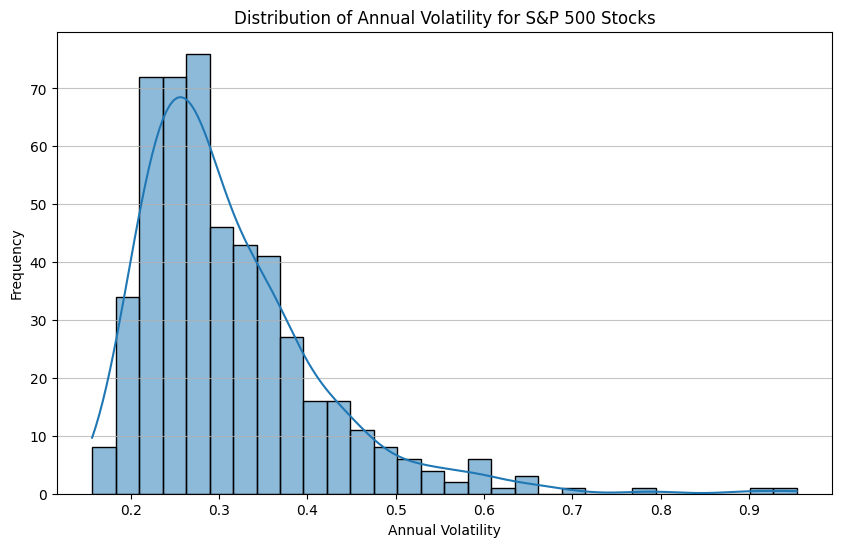

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(betas['Annual_Volatility'], kde=True, bins=30)
plt.title('Distribution of Annual Volatility for S&P 500 Stocks')
plt.xlabel('Annual Volatility')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

###TASK 03: Stock segmentation with agglomerative clustering

In [24]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [25]:
#assigning Beta column to X
X = betas[['Beta']]

####The silhoutte method: find optimal number of clusters

In [26]:
#testing number of cluster from 2 to 10 and collecting the silhouette scores
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
scores = [] #empty list to store our scores that we will calculate later on

#loop for each cluster, each iteration it will calculate each aggl. cluster
for n_clusters in range_n_clusters:
 agglom = AgglomerativeClustering(n_clusters=n_clusters)
 agglom.fit(X)
 labels = agglom.labels_
 scores.append(silhouette_score(X, labels)) #append the scores: to add it to our list, X is our beta value

#looking at the scores, and their average/mean | display the silhouette scores for each number of clusters
scores
average = sum(scores)/len(scores)

import plotly.express as px
fig = px.line(x=range_n_clusters, y=scores, title='Silhouette Score vs. Number of Clusters')
fig.update_layout(xaxis_title="Number of Clusters", yaxis_title="Silhouette Score")
fig

#####For each potential optimal number of cluster, we will create a scatter plot

Cluster 0 has 264 observations
Cluster 1 has 232 observations


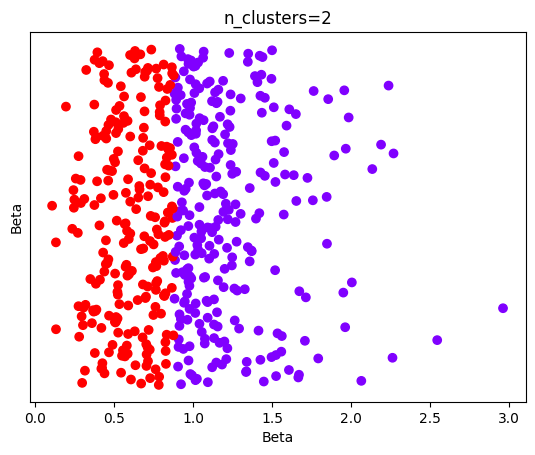

Cluster 0 has 232 observations
Cluster 1 has 76 observations
Cluster 2 has 188 observations


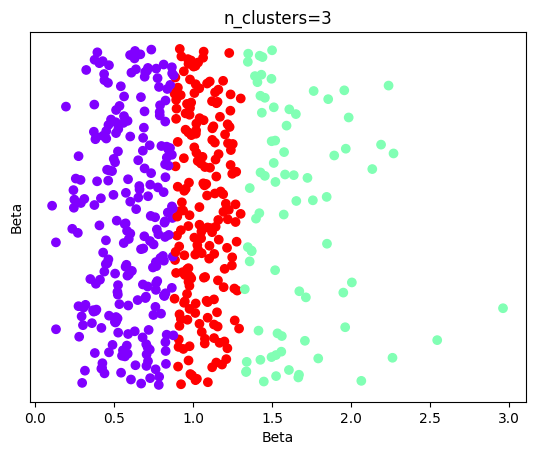

Cluster 0 has 76 observations
Cluster 1 has 124 observations
Cluster 2 has 188 observations
Cluster 3 has 108 observations


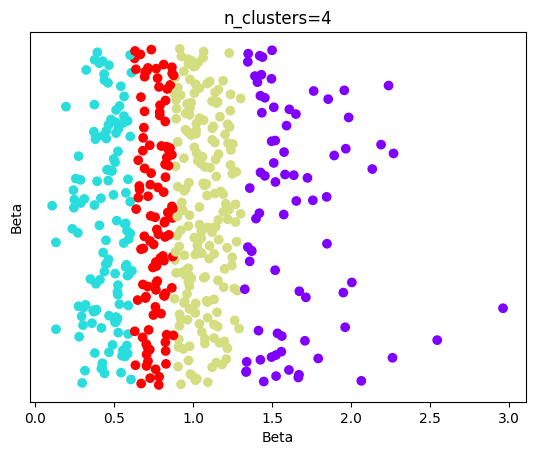

Cluster 0 has 188 observations
Cluster 1 has 124 observations
Cluster 2 has 24 observations
Cluster 3 has 108 observations
Cluster 4 has 52 observations


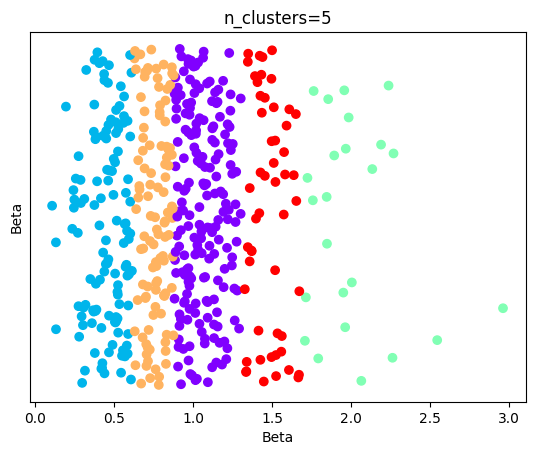

Cluster 0 has 24 observations
Cluster 1 has 124 observations
Cluster 2 has 123 observations
Cluster 3 has 108 observations
Cluster 4 has 52 observations
Cluster 5 has 65 observations


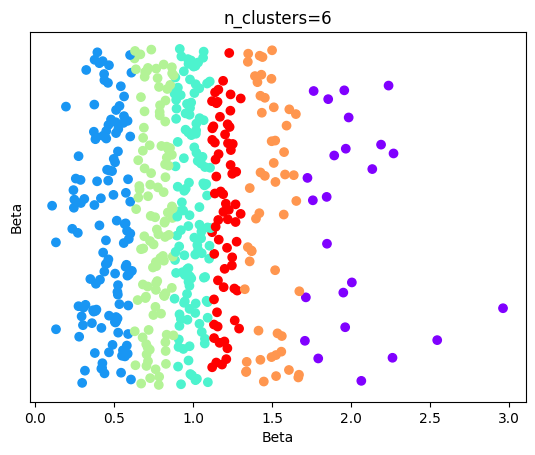

Cluster 0 has 124 observations
Cluster 1 has 8 observations
Cluster 2 has 123 observations
Cluster 3 has 108 observations
Cluster 4 has 52 observations
Cluster 5 has 65 observations
Cluster 6 has 16 observations


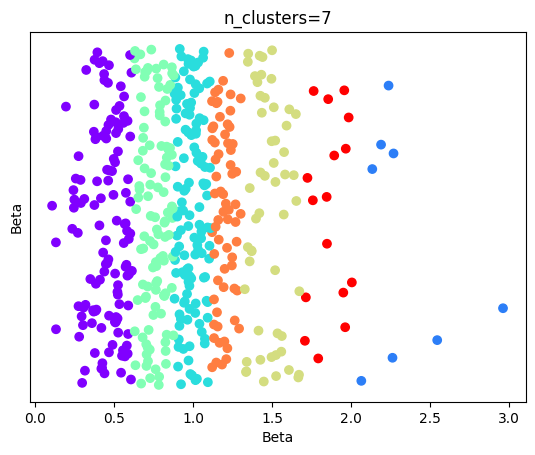

Cluster 0 has 8 observations
Cluster 1 has 108 observations
Cluster 2 has 123 observations
Cluster 3 has 69 observations
Cluster 4 has 52 observations
Cluster 5 has 65 observations
Cluster 6 has 16 observations
Cluster 7 has 55 observations


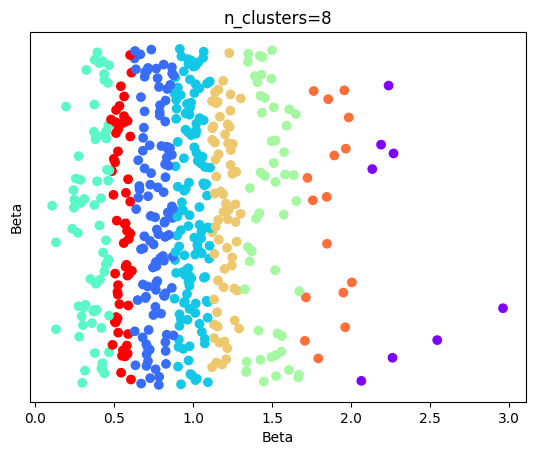

Cluster 0 has 108 observations
Cluster 1 has 69 observations
Cluster 2 has 123 observations
Cluster 3 has 2 observations
Cluster 4 has 52 observations
Cluster 5 has 65 observations
Cluster 6 has 16 observations
Cluster 7 has 55 observations
Cluster 8 has 6 observations


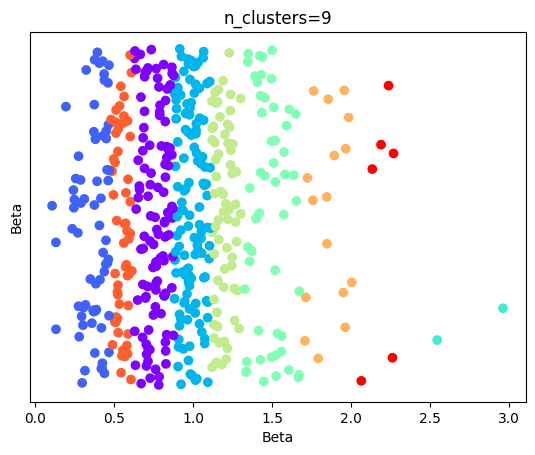

In [27]:
# Loop through a range of possible cluster numbers (e.g., 2 to 10)
# test different values of n_clusters to find the best clustering structure.
for n_clusters in range_n_clusters:

    # Create an Agglomerative Clustering model with the current number of clusters
    model = AgglomerativeClustering(n_clusters=n_clusters)

    # Fit the model to the data (X) and predict the cluster labels for each data point
    # 'labels' will be an array showing which cluster each data point belongs to
    labels = model.fit_predict(X)

    # Create a scatter plot of the data points
    # The x-axis is the feature values from X
    # The y-axis is 'betas["Stock_Name"]' (used to separate points visually)
    # The color of each point (c=labels) indicates its assigned cluster
    plt.scatter(X, betas['Stock_Name'], c=labels, cmap='rainbow')

    # Label the axes and give the plot a title showing the current number of clusters
    plt.xlabel('Beta')
    plt.ylabel('Beta')
    plt.title(f"n_clusters={n_clusters}")

    # Count how many observations belong to each cluster | print how many stocks are in each cluster
    # np.bincount(labels) returns counts of each cluster label (0, 1, ..., n_clusters=1)
    cluster_counts = np.bincount(labels)

    # Print the number of observations in each cluster
    for i in range(n_clusters):
        print(f"Cluster {i} has {cluster_counts[i]} observations")

    # Hides y-axis text for cleaner look
    plt.yticks([])

    # Display the scatter plot for this number of clusters
    plt.show()

#####based on above plots the optimal number of clusters seem to be

In [28]:
optimal_n_clusters = 3
agglom = AgglomerativeClustering(n_clusters=optimal_n_clusters)
cluster_labels = agglom.fit_predict(X)
betas['Cluster'] = cluster_labels
betas.head() #displays the stock with the clusters they are assigned into

,Stock_Name,Daily_Return,Beta,Annual_Volatility,Cluster
0,MMM,0.000160,0.783736,0.295654,0
1,AOS,-0.000047,0.924451,0.278673,2
2,ABT,-0.000106,0.672317,0.217839,0
3,ABBV,0.000610,0.299098,0.219958,0
4,ACN,0.000011,1.094208,0.270331,2


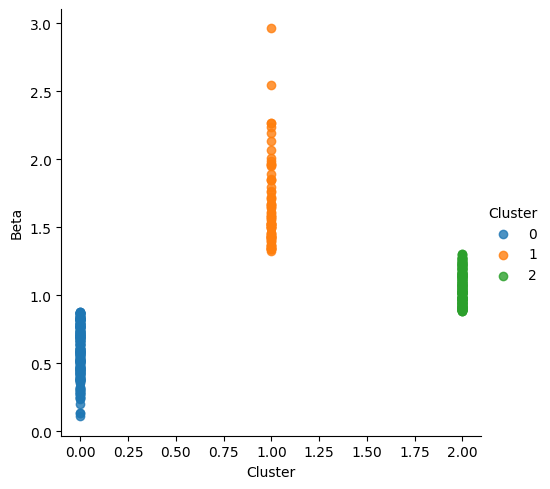

In [29]:
sns.lmplot(data=betas, x='Cluster', y='Beta', hue='Cluster',
 legend=True, legend_out=True)

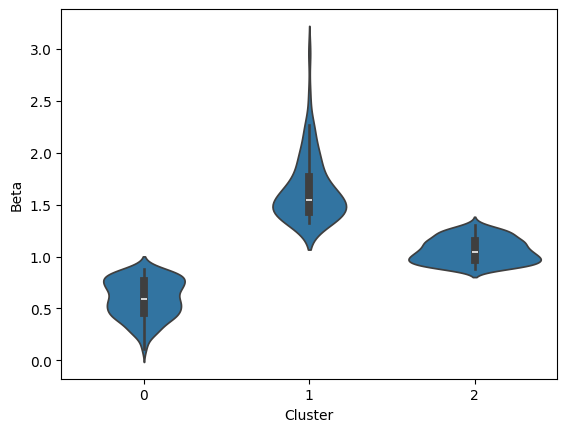

In [30]:
#violin plot to show the distribution of each cluster
sns.violinplot(x='Cluster', y='Beta', data=betas)
plt.show()

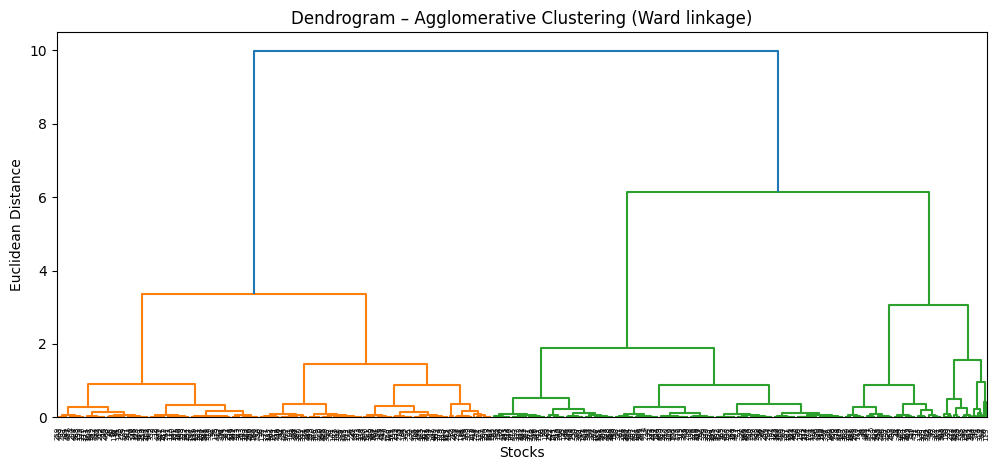

In [31]:
#Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, method='ward')

plt.figure(figsize=(12,5))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title("Dendrogram – Agglomerative Clustering (Ward linkage)")
plt.xlabel("Stocks")
plt.ylabel("Euclidean Distance")
plt.show()

###Task 04: Stock segmentation with K-means

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

In [33]:
X1 = betas[['Beta', 'Annual_Volatility']]

In [34]:
#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

####Elbow Method to narrow down a small range of possible 𝑘 values.

In [35]:
#elbow method
# 2. Calculate WCSS for a range of k values
wcss = []
k_range = range(1, 11) # Test k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia_ attribute gives WCSS

# 3. Plot the Elbow Curve
fig = px.line(x=k_range, y=wcss, title='Elbow Method for Optimal K')
fig.update_layout(xaxis_title='Number of Clusters (k)', yaxis_title='Within-Cluster Sum of Squares (WCSS)')
fig.show()

In [36]:
#testing number of clusters from 2 to 10 and collecting the silhouette scores
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
scores = []   #empty list to store our scores

#loop for each cluster, each iteration calculates the kmeans cluster
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    labels = km.fit_predict(X_scaled)   #X_scaled is Beta + Volatility
    scores.append(silhouette_score(X_scaled, labels))  #append the silhouette score

#looking at the scores and their average/mean | display the silhouette scores
scores
average = sum(scores)/len(scores)

fig1 = px.line(
    x=range_n_clusters,
    y=scores,
    markers=True,
    title='Silhouette Score vs Number of Clusters'
)
fig.update_layout(
    xaxis_title="Number of Clusters",
    yaxis_title="Silhouette Score",
    template='plotly_white'
)
fig1

In [37]:
#Taking 3 clusters
km1=KMeans(n_clusters=3)
#Fitting the input data
km1.fit(X1)
#predicting the labels of the input data
y=km1.predict(X1)
#adding the labels to a column named label
betas['Cluster']  = y
#The new dataframe with the clustering done
betas.head()

,Stock_Name,Daily_Return,Beta,Annual_Volatility,Cluster
0,MMM,0.000160,0.783736,0.295654,1
1,AOS,-0.000047,0.924451,0.278673,1
2,ABT,-0.000106,0.672317,0.217839,0
3,ABBV,0.000610,0.299098,0.219958,0
4,ACN,0.000011,1.094208,0.270331,1


###alternative task 4

In [38]:
X1 = betas[['Beta', 'Annual_Volatility']].copy()

print("Features used for clustering:")
display(X1.head())

Features used for clustering:


,Beta,Annual_Volatility
0,0.783736,0.295654
1,0.924451,0.278673
2,0.672317,0.217839
3,0.299098,0.219958
4,1.094208,0.270331


In [39]:
# 1. Compute skewness
skewness = X1.skew()
print("Skewness BEFORE transformation:\n", skewness)

# 2. Apply log transformation only to right-skewed features
X1_transformed = X1.copy()

for col in X1.columns:
    if skewness[col] > 1:   # standard threshold from applied ML literature
        X1_transformed[col] = np.log1p(X1[col])

# 3. Check skewness after transform
print("\nSkewness AFTER transformation:\n", X1_transformed.skew())

Skewness BEFORE transformation:
 Beta                 0.870847
Annual_Volatility    1.924780
dtype: float64

Skewness AFTER transformation:
 Beta                 0.870847
Annual_Volatility    1.506807
dtype: float64


In [40]:
#feature scaling
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1_transformed)

print("Scaled sample:\n", X1_scaled[:5])

Scaled sample:
 [[-0.35729702 -0.11723981]
 [-0.01994941 -0.2948443 ]
 [-0.62441114 -0.95107339]
 [-1.51916379 -0.9276739 ]
 [ 0.38702527 -0.3829595 ]]


In [41]:
#elbow method
wcss = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    km.fit(X1_scaled)
    wcss.append(km.inertia_)

fig_elbow = px.line(
    x=list(k_range),
    y=wcss,
    title="Elbow Method for Optimal K"
)
fig_elbow.update_layout(
    xaxis_title='Number of Clusters (k)',
    yaxis_title='Within-Cluster Sum of Squares (WCSS)'
)
fig_elbow.show()

In [42]:
#testing number of clusters from 2 to 10 and collecting the silhouette scores
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
scores = []

# Loop for each k
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    labels = km.fit_predict(X1_scaled)
    scores.append(silhouette_score(X1_scaled, labels))

# Display silhouette scores
print("Silhouette Scores:", scores)

# Plot silhouette scores
fig1 = px.line(
    x=range_n_clusters,
    y=scores,
    markers=True,
    title='Silhouette Score vs Number of Clusters'
)

fig1.update_layout(
    xaxis_title="Number of Clusters",
    yaxis_title="Silhouette Score",
    template='plotly_white'
)

fig1.show()

Silhouette Scores: [np.float64(0.5281282711602497), np.float64(0.4355707666301003), np.float64(0.42323988273334157), np.float64(0.3739199110838836), np.float64(0.4076227805879593), np.float64(0.3855983546206264), np.float64(0.3423993187742734), np.float64(0.34614223528112553), np.float64(0.34304263401423457)]


In [43]:
# choose the best k
best_k = range_n_clusters[scores.index(max(scores))]
print("\nChosen optimal k:", best_k)


Chosen optimal k: 2


In [44]:
#Fit final K-Means model
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=20)
labels_final = kmeans_final.fit_predict(X1_scaled)

betas['Cluster'] = labels_final

In [45]:
#Taking 3 clusters
km1=KMeans(n_clusters=2)
#Fitting the input data
km1.fit(X1)
#predicting the labels of the input data
y=km1.predict(X1)
#adding the labels to a column named label
betas['Cluster']  = y
#The new dataframe with the clustering done
betas.head()

,Stock_Name,Daily_Return,Beta,Annual_Volatility,Cluster
0,MMM,0.000160,0.783736,0.295654,0
1,AOS,-0.000047,0.924451,0.278673,0
2,ABT,-0.000106,0.672317,0.217839,0
3,ABBV,0.000610,0.299098,0.219958,0
4,ACN,0.000011,1.094208,0.270331,1


In [46]:
# 4.7 Extract Centroids (in original scale)
centroids_scaled = kmeans_final.cluster_centers_
centroids_unscaled = scaler.inverse_transform(centroids_scaled)

centroids_df = pd.DataFrame(
    centroids_unscaled,
    columns=['Beta', 'Annual_Volatility']
).round(6)

print("\nCluster centroids (original scale):")
display(centroids_df)


Cluster centroids (original scale):


,Beta,Annual_Volatility
0,0.760072,0.235854
1,1.473897,0.367583


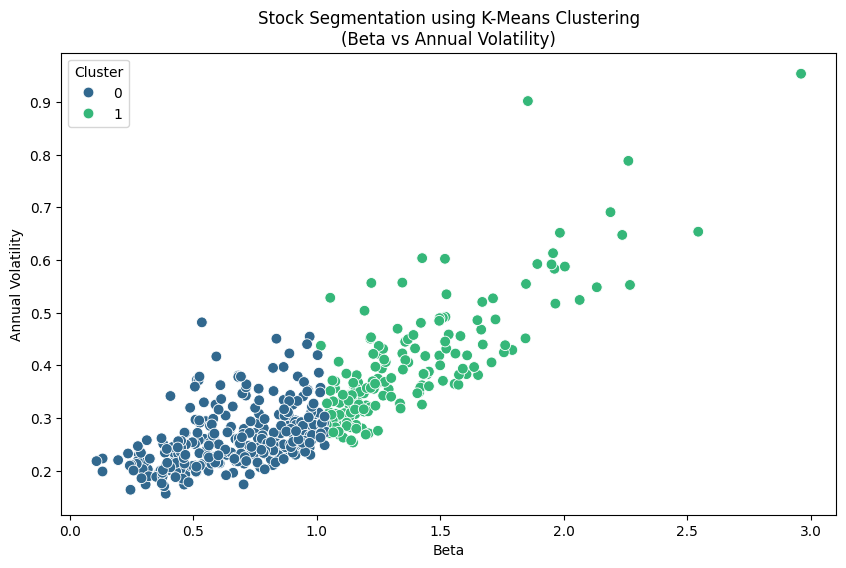

In [47]:
#cluster scatter plot
# Scatterplot of K-means clusters (Task 4 CW Version)

plt.figure(figsize=(10,6))

sns.scatterplot(
    x='Beta',
    y='Annual_Volatility',
    hue='Cluster',
    palette='viridis',
    data=betas,
    s=60,
    legend='full'
)

plt.xlabel('Beta')
plt.ylabel('Annual Volatility')
plt.title('Stock Segmentation using K-Means Clustering\n(Beta vs Annual Volatility)')
plt.show()

In [48]:
# 4.8 Scatter Plot of Cluster Segmentation
fig_clust = px.scatter(
    betas,
    x='Beta',
    y='Annual_Volatility',
    color='Cluster',
    title='K-Means Clusters: Beta vs Annual Volatility',
    hover_data=['Stock_Name']
)

# Add centroids to plot
fig_clust.add_scatter(
    x=centroids_df['Beta'],
    y=centroids_df['Annual_Volatility'],
    mode='markers',
    marker=dict(size=12, color='black', symbol='x'),
    name='Centroids'
)

fig_clust.show()

In [49]:
#Cluster Profiling Table
cluster_profile = betas.groupby('Cluster')[['Beta', 'Annual_Volatility', 'Daily_Return']].agg(
    Count=('Beta', 'count'),
    Beta_Mean=('Beta', 'mean'),
    Volatility_Mean=('Annual_Volatility', 'mean'),
    Daily_Return_Mean=('Daily_Return', 'mean')
).round(6)

print("\nCluster Profiling Summary:")
display(cluster_profile)


Cluster Profiling Summary:


,Count,Beta_Mean,Volatility_Mean,Daily_Return_Mean
Cluster,,,,
0,321,0.694983,0.263123,0.00035
1,175,1.368944,0.398078,0.00052
